# Importing Libraries


In [42]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from keras.utils import to_categorical, plot_model

In [44]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

# Dataset Creation

### Images with Brain Tumor

In [45]:
data = []
paths = []
result = []

for r, d, f in os.walk("C:\\Users\\ASWATHY L\\OneDrive\\Desktop\\baselious\\brain_tumor_dataset\\yes"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

### Images without Brain Tumor

In [46]:
paths = []
for r, d, f in os.walk("C:\\Users\\ASWATHY L\\OneDrive\\Desktop\\baselious\\brain_tumor_dataset\\no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [47]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [48]:
result = np.array(result)
result = result.reshape(139,2)

# Visualization of Tumor Images

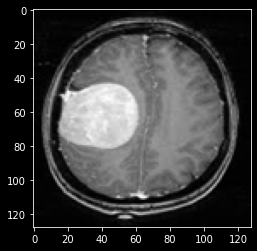

In [49]:
plt.imshow(data[0])

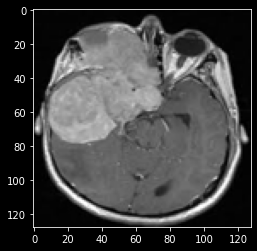

In [50]:
plt.imshow(data[5])

## Data Splitting

In [51]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

## Model Creation Using Sequential Method

In [52]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      416       
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_4 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 64)       

## Model Configuration

In [53]:
model.compile(loss = "binary_crossentropy", optimizer='Adam',metrics=['accuracy'])

In [59]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ASWATHY L\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [62]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ASWATHY L\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


### Plotting Model Creation Summary

In [63]:
plot_model(model, to_file='cnn-tumor.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [64]:
x_train.shape

(111, 128, 128, 3)

In [65]:
y_train.shape

(111, 2)

## Model Training 

In [66]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 64, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
2/2 [==============================] - 6s 2s/step - loss: 19.8308 - accuracy: 0.5315 - val_loss: 74.6754 - val_accuracy: 0.6786
Epoch 2/30
2/2 [==============================] - 3s 2s/step - loss: 20.8152 - accuracy: 0.6847 - val_loss: 47.4335 - val_accuracy: 0.7143
Epoch 3/30
2/2 [==============================] - 4s 2s/step - loss: 10.8808 - accuracy: 0.7748 - val_loss: 31.2886 - val_accuracy: 0.6429
Epoch 4/30
2/2 [==============================] - 4s 2s/step - loss: 3.9247 - accuracy: 0.8288 - val_loss: 15.2121 - val_accuracy: 0.7143
Epoch 5/30
2/2 [==============================] - 4s 2s/step - loss: 2.4199 - accuracy: 0.8739 - val_loss: 12.5859 - val_accuracy: 0.7143
Epoch 6/30
2/2 [==============================] - 4s 2s/step - loss: 2.4063 - accuracy: 0.8919 - val_loss: 12.4529 - val_accuracy: 0.6786
Epoch 7/30
2/2 [==============================] - 4s 2s/step - loss: 1.2430 - accuracy: 0.9189 - val_loss: 9.0642 - val_accuracy: 0.7500
Epoch 8/30
2/2 [================

## Model Evaluation 

In [67]:
score = model.evaluate(x_test, y_test, batch_size=64)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

1/1 [==============================] - 0s 153ms/step - loss: 5.0501 - accuracy: 0.7500

Test accuracy: 75.0%


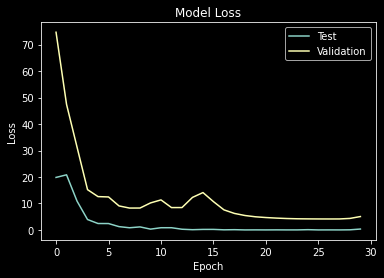

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [69]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

#  Model Prediction

100.0% Confidence This Is No, Its not a tumor


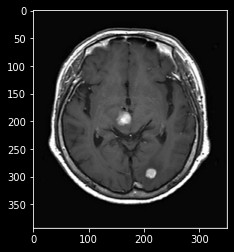

In [70]:
from matplotlib.pyplot import imshow
img = Image.open("C:\\Users\\ASWATHY L\\OneDrive\\Desktop\\baselious\\brain_tumor_dataset\\no\\N17.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

100.0% Confidence This Is A Its a Tumor


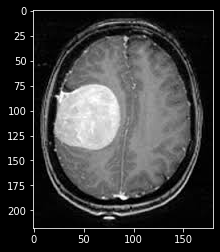

In [71]:
from matplotlib.pyplot import imshow
img = Image.open("C:\\Users\\ASWATHY L\\OneDrive\\Desktop\\baselious\\brain_tumor_dataset\\yes\\Y1.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))